{'O': 0, 'B': 1, 'I': 2}


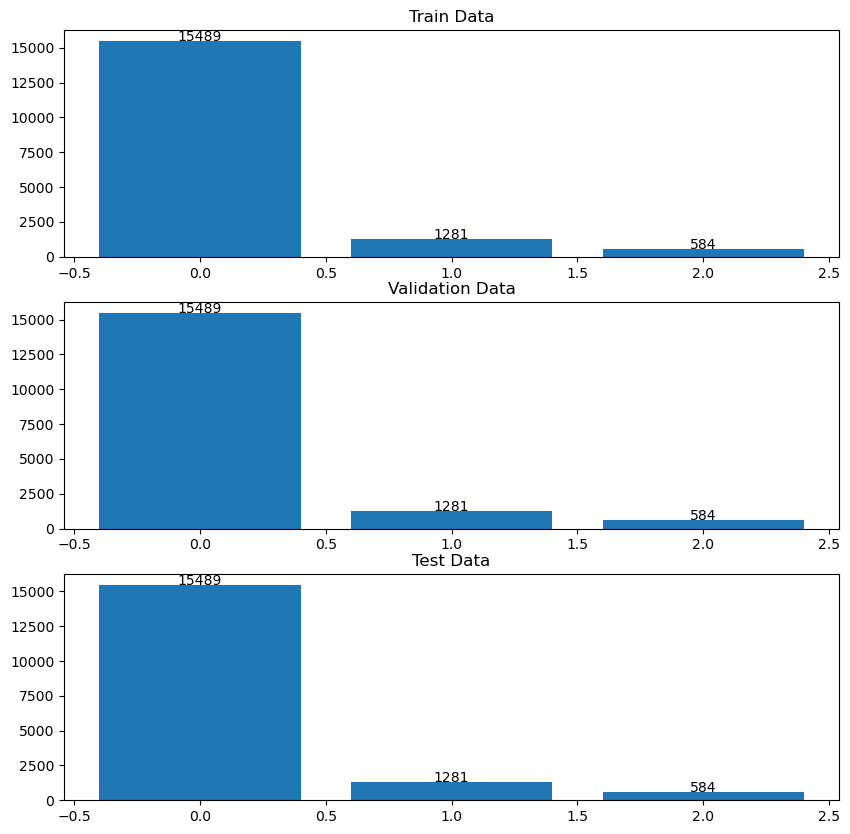

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

train_data = json.load(open('../data/ATE_train.json', 'r'))
val_data = json.load(open('../data/ATE_val.json', 'r'))
test_data = json.load(open('../data/ATE_test.json', 'r'))

class_to_idx = {}
for index, data in train_data.items():
    labels = data['labels']
    for label in labels:
        if label not in class_to_idx:
            class_to_idx[label] = len(class_to_idx)
print(class_to_idx)
            
all_labels_train = []
for index, data in train_data.items():
    labels = data['labels']
    all_labels_train.extend([class_to_idx[label] for label in labels])
            
all_labels_val = []
for index, data in val_data.items():
    labels = data['labels']
    all_labels_val.extend([class_to_idx[label] for label in labels])

all_labels_test = []
for index, data in test_data.items():
    labels = data['labels']
    all_labels_test.extend([class_to_idx[label] for label in labels])

unique_label_train, counts_label_train = np.unique(all_labels_train, return_counts=True)
unique_label_val, counts_label_val = np.unique(all_labels_val, return_counts=True)
unique_label_test, counts_label_test = np.unique(all_labels_test, return_counts=True)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].bar(unique_label_train, counts_label_train)
ax[0].set_title('Train Data')
for i, v in enumerate(counts_label_train):
    ax[0].text(i, v + 10, str(v), ha='center')
ax[1].bar(unique_label_val, counts_label_val)
ax[1].set_title('Validation Data')
for i, v in enumerate(counts_label_val):
    ax[1].text(i, v + 10, str(v), ha='center')
ax[2].bar(unique_label_test, counts_label_test)
ax[2].set_title('Test Data')
for i, v in enumerate(counts_label_test):
    ax[2].text(i, v + 10, str(v), ha='center')
plt.show()